Number of points in each cluster:
Cluster 0: 698 movies
Cluster 1: 4488 movies
Cluster 2: 942 movies


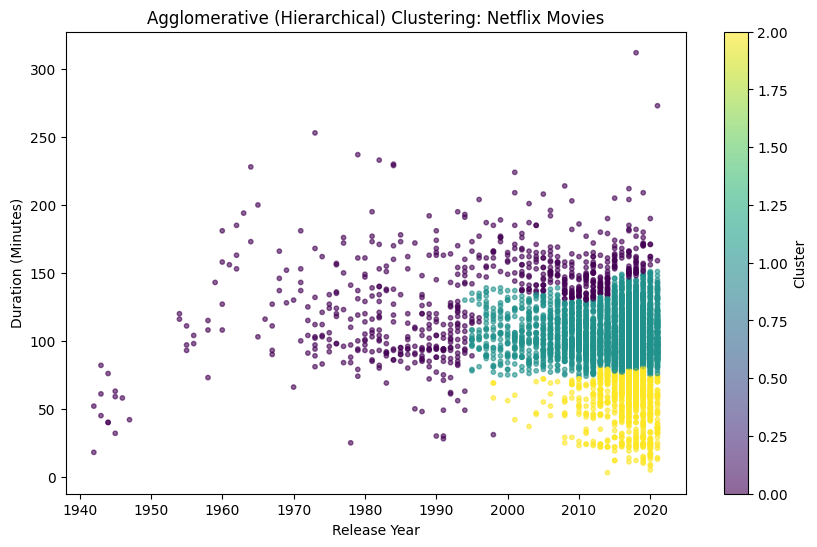

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# ---------- 1. Data Preparation ----------

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/netflix_data.csv')

# Filter for Movies
df_movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (e.g. "90 min" -> 90)
df_movies['duration_min'] = (
    df_movies['duration']
    .str.replace(' min', '', regex=False)
    .astype(float)
)

# Drop rows with missing year or duration
df_movies = df_movies.dropna(subset=['duration_min', 'release_year'])

# Features: Release Year & Duration
features = df_movies[['release_year', 'duration_min']].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# ---------- 2. Agglomerative Clustering ----------

n_clusters = 3

agg_model = AgglomerativeClustering(
    n_clusters=n_clusters,
    linkage='ward'
)

labels = agg_model.fit_predict(X_scaled)

print("Number of points in each cluster:")
(unique, counts) = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Cluster {u}: {c} movies")

# ---------- 3. Visualization ----------

plt.figure(figsize=(10, 6))

plt.scatter(
    features[:, 0],     # release year
    features[:, 1],     # duration
    c=labels,
    cmap='viridis',
    s=10,
    alpha=0.6
)

plt.title('Agglomerative (Hierarchical) Clustering: Netflix Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (Minutes)')
plt.colorbar(label='Cluster')
plt.show()